# Perform analyses of 400-member prior/truth reconstructions.

In [1]:
# put the directory path to your LMR repository here
import sys
sys.path.append("/Users/dan/Desktop/LMR_py3/")
#!cd /Users/dan/Desktop/LMR_py3

# prefix for figure filename
#fig_prefix='prior_truth_'

In [2]:
import os
os.chdir('/Users/dan/Desktop/LMR_py3')
import LMR_lite_utils as LMRlite
import LMR_utils
import LMR_config
import numpy as np
import os,sys
from time import time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
%matplotlib inline
import cartopy.util as cutil
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
import matplotlib

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.rcParams['font.family'] = 'Arial'


Loading information from datasets.yml
Loading information from grid_def.yml


# Define plotting routine

In [8]:
# Plot fraction of error

def plt_FOE(cdd,Xd,savename):
    
    VM = 1.
    
    import cartopy.util as cutil
    import cartopy.crs as ccrs
    from cartopy.mpl.geoaxes import GeoAxes
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from mpl_toolkits.axes_grid1 import AxesGrid
    import matplotlib.cm as cm

    projection = ccrs.PlateCarree(central_longitude=0.)
    axes_class = (GeoAxes,
                  dict(map_projection=projection))
    
    grid = cdd[0]['grid']


    # Compute mean truth variances over 3 realizations each
    key = np.array([[0,1,2],[3,4,5],[6,7,8]])
    tvar = np.zeros([3,91*180])*np.nan
    for ii in np.arange(3):
        tvar[ii,:] = np.mean(np.var(Xd[key[ii,:],:,:],2),0)
    
    fig = plt.figure(figsize=(9,16))
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(3, 2),
                    axes_pad=0.6,
                    cbar_location='bottom',
    #               cbar_mode='each',
                    cbar_mode='single',
                    cbar_pad=-0.,
                    cbar_size='3%',
                    cbar_set_cax=False,
                    label_mode='')  # note the empty label_mode

    ntt_ax = [1,3,6,2,5,7]
    # Indices of truth experiments
    tt_eq  = [0,4,8,0,4,8]
    tvari  = [0,1,2,0,1,2]
    # Switch row/column order of plotting
    switch = [0,3,1,4,2,5]

    vmin = -1.0
    vmax = 1.0

    cmap = 'RdBu_r' 
    
    for j, ax in enumerate(axgr):
        jj = switch[j]
        
        # RMSE of an experiment
        rmsc = cdd[ntt_ax[jj]]['rmse']
        # RMSE of experiment with the same truth case where the prior is drawn from the same distribution as the truth
        rt   = cdd[tt_eq[jj]]['rmse']
        
        cldat = ((rmsc**2-rt**2)/rmsc**2).reshape(grid.nlat,grid.nlon)
        wrap_data, wrap_lon = cutil.add_cyclic_point(cldat, coord=grid.lon[0,:], axis=1)

        plt.sca(axgr[j])

        p=plt.pcolormesh(wrap_lon,grid.lat[:,0],wrap_data,vmax=VM,vmin=-VM,
                        transform=projection,
                        cmap='RdBu_r'
                        )

        plt.title('Prior: '+ cdd[ntt_ax[jj]]['prior_name'])
        #plt.title('Prior: '+ cdd[ntt_ax[jj]]['prior_name'] + ', truth: ' + cdd[ntt_ax[jj]]['truth_name'] +
        #          '\n minus Prior: '+ cdd[tt_eq[jj]]['prior_name'] + ', truth: ' + cdd[tt_eq[jj]]['truth_name'])
        
        ax.coastlines(color='gray')
        ax.grid(which='major', axis='both')
        
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)

        ax.set_yticks(np.linspace(-80, 80, 5), crs=projection)
        lat_formatter = LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
        
        if cdd[jj]['pind']!=2:
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off

        if np.mod(j,2)!=0:
            plt.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                left=False,      # ticks along the bottom edge are off
                labelleft=False) # labels along the bottom edge are off
        
    cb=axgr.cbar_axes[0].colorbar(p)
    cb.ax.set_xticks(np.arange(-1.,1.25,.25))  
    plt.savefig(savename+'.png',bbox_inches='tight',dpi=300)

In [6]:
# Plot noise to signal ratios (variance)

def plt_n2s(cdd,Xd,savename):
    
    VM = 1.5
    
    import cartopy.util as cutil
    import cartopy.crs as ccrs
    from cartopy.mpl.geoaxes import GeoAxes
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from mpl_toolkits.axes_grid1 import AxesGrid
    import matplotlib.cm as cm

    projection = ccrs.PlateCarree(central_longitude=0.)
    axes_class = (GeoAxes,
                  dict(map_projection=projection))
    
    grid = cdd[0]['grid']


    # Compute mean truth variances over 3 realizations each
    key = np.array([[0,1,2],[3,4,5],[6,7,8]])
    tvar = np.zeros([3,91*180])*np.nan
    for ii in np.arange(3):
        tvar[ii,:] = np.mean(np.var(Xd[key[ii,:],:,:],2),0)
    
    fig = plt.figure(figsize=(4,16))
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(3,1),
                    axes_pad=0.6,
                    cbar_location='bottom',
    #               cbar_mode='each',
                    cbar_mode='single',
                    cbar_pad=-0.,
                    cbar_size='6%',
                    cbar_set_cax=False,
                    label_mode='')  # note the empty label_mode

    tt_ax = [0,4,8]

    for jj, ax in enumerate(axgr):
        evar = cdd[tt_ax[jj]]['rmse']
        
        #cldat = (evar/tvar[jj,:]**.5).reshape(grid.nlat,grid.nlon)
        
        # N2S as a ratio of variances
        cldat = (evar**2/tvar[jj,:]).reshape(grid.nlat,grid.nlon)
        wrap_data, wrap_lon = cutil.add_cyclic_point(cldat, coord=grid.lon[0,:], axis=1)

        plt.sca(axgr[jj])
        p=plt.pcolormesh(wrap_lon,grid.lat[:,0],wrap_data,vmax=VM,vmin=0.,
                        transform=projection,
                        cmap='inferno_r',
                        )
        plt.title('Prior: '+ cdd[tt_ax[jj]]['prior_name'])

        #plt.title('Prior: '+ cdd[tt_ax[jj]]['prior_name'] + ', truth: ' + cdd[tt_ax[jj]]['truth_name'])

        ax.coastlines(color='gray')
        plt.grid(b=None, which='major', axis='both')
        
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)

        ax.set_yticks(np.linspace(-80, 80, 5), crs=projection)
        lat_formatter = LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
        
        if cdd[jj]['pind']!=2:
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off

    cb=axgr.cbar_axes[0].colorbar(p)
    plt.savefig(savename+'_1.png',bbox_inches='tight',dpi=300)
    
    #############

    fig = plt.figure(figsize=(9,16))
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(3, 2),
                    axes_pad=0.6,
                    cbar_location='bottom',
    #               cbar_mode='each',
                    cbar_mode='single',
                    cbar_pad=-0.,
                    cbar_size='3%',
                    cbar_set_cax=False,
                    label_mode='')  # note the empty label_mode

    ntt_ax = [1,3,6,2,5,7]
    # Indices of truth experiments
    tt_eq  = [0,4,8,0,4,8]
    tvari  = [0,1,2,0,1,2]

    # Switch row/column order of plotting
    switch = [0,3,1,4,2,5]
    
    vmin = -1.
    vmax =  1.

    cmap = 'RdBu_r' 
    
    for j, ax in enumerate(axgr):

        jj = switch[j]
        rmsc = cdd[ntt_ax[jj]]['rmse']
        rt   = cdd[tt_eq[jj]]['rmse']
        
        #cldat = ((rmsc-rt)/tvar[tvari[jj]]**.5).reshape(grid.nlat,grid.nlon)
        # NSR as a ratio of variances
        cldat = ((rmsc**2-rt**2)/tvar[tvari[jj]]).reshape(grid.nlat,grid.nlon)
        wrap_data, wrap_lon = cutil.add_cyclic_point(cldat, coord=grid.lon[0,:], axis=1)

        plt.sca(axgr[j])
        p=plt.pcolormesh(wrap_lon,grid.lat[:,0],wrap_data,vmax=vmax,vmin=vmin,
                        transform=projection,
                        cmap='RdBu_r'
                        )

        plt.title('Prior: '+ cdd[ntt_ax[jj]]['prior_name'])

        #plt.title('Prior: '+ cdd[ntt_ax[jj]]['prior_name'] + ', truth: ' + cdd[ntt_ax[jj]]['truth_name'] +
        #          '\n minus Prior: '+ cdd[tt_eq[jj]]['prior_name'] + ', truth: ' + cdd[tt_eq[jj]]['truth_name'])
        
        ax.coastlines(color='gray')
        plt.grid(b=None, which='major', axis='both')

        ax.set_yticks(np.linspace(-80, 80, 5), crs=projection)
        lat_formatter = LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
     
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)

        if cdd[jj]['pind']!=2:
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off

        plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        labelleft=False) # labels along the bottom edge are off


    cb=axgr.cbar_axes[0].colorbar(p)
    cb.ax.set_xticks(np.arange(-1,1.25,.25))
    plt.savefig(savename+'_2.png',bbox_inches='tight',dpi=300)

In [25]:
def plt_zonmean(cdd,Xd,savename):

    # Zonal means plot of the fraction of error attributed to structural error

    lat = cdd[0]['grid'].lat[:,0]

    # This is an array of the results I want to plot. Each column appears on a plot. 
    key = np.array([[0,3,6],[1,4,7],[2,5,8]])

    # identify which is the truth-truth pair in each column
    ttkey = np.array([0,1,2])

    colkey = ['r','c','y']
    rr = np.empty(2)

    for ii in np.arange(3):
        # List of cdd elements appearing in this plot
        keyii = key[:,ii]

        # Compute truth variance averaged over the three different realizations
        # This should no longer matter now that all truths are exactly the same.
        Xdmv = np.mean(np.var(Xd[keyii,:,:],2),0).reshape([91,180])

        # Define indices that aren't truth-truth pairs
        not_tt = [x for i,x in enumerate(np.array([0,1,2])) if x!=ttkey[ii]]

        # Truth - truth case
        ttr  = np.mean(cdd[keyii[ttkey[ii]]]['rmse'].reshape([91,180])**2,1)
        print(cdd[keyii[ttkey[ii]]]['prior_name'])
        print(cdd[keyii[ttkey[ii]]]['truth_name'])

        # Cases where prior is not the same as truth
        rr0  = np.mean(cdd[keyii[not_tt[0]]]['rmse'].reshape([91,180])**2,1)
        print(cdd[keyii[not_tt[0]]]['prior_name'])
        print(cdd[keyii[not_tt[0]]]['truth_name'])

        rr1  = np.mean(cdd[keyii[not_tt[1]]]['rmse'].reshape([91,180])**2,1)
        print(cdd[keyii[not_tt[1]]]['prior_name'])
        print(cdd[keyii[not_tt[1]]]['truth_name'])

        fig = plt.figure(figsize=(2,2))
        ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
        plt.plot((rr0-ttr)/rr0,lat,colkey[not_tt[0]],linewidth=2)
        plt.plot((rr1-ttr)/rr1,lat,colkey[not_tt[1]],linewidth=2)

        #plt.ylabel('Zonal mean\nfraction of error\ndue to prior')
        plt.xlim([0.,0.4])
        plt.ylim([-90,90])
    #    plt.ylabel('Latitude')
    #    plt.yticks([-60,-30,0,30,60])
        plt.yticks([-80,-40,0,40,80])
        plt.xticks([0,0.1,0.2,0.3,0.4])
    #    ax.set_yticklabels(['60°S','30°S','0°','30°N','60°N'])
        ax.set_yticklabels(['80°S','40°S','0°','40°N','80°N'])
        plt.grid(axis='both')  
        plt.savefig(savename+cdd[keyii[0]]['truth_name']+'.pdf', bbox_inches='tight')
        plt.show()


# Scaled variance case

/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


CCSM4
CCSM4
MPI-ESM
CCSM4
HadCM3
CCSM4


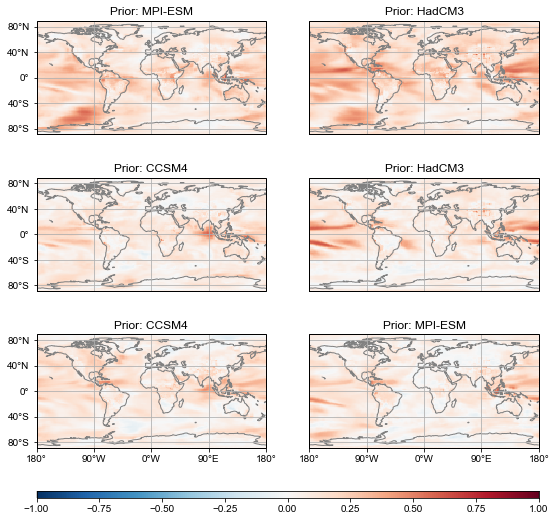

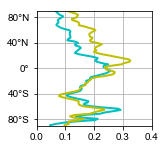

MPI-ESM
MPI-ESM
CCSM4
MPI-ESM
HadCM3
MPI-ESM


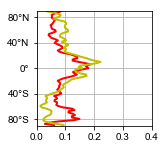

HadCM3
HadCM3
CCSM4
HadCM3
MPI-ESM
HadCM3


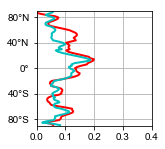

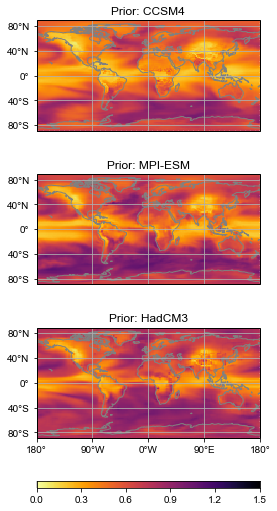

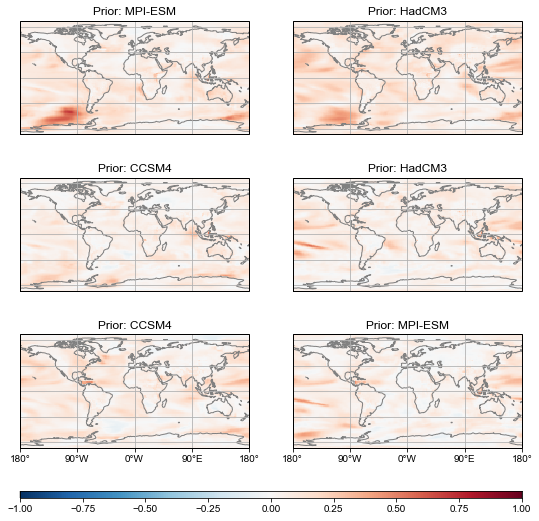

In [32]:
# Load files
SNR = 0.4
cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_400_rand_draws_one_truth_scale_prior_locrad_0.0.npy')
Xd   = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_400_rand_draws_one_truth_scale_prior_locrad_0.0_ad.npy')
savekey = '_scale_prior'

savename1 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/map_FOE'+savekey+'_SNR_'+str(SNR)
plt_FOE(cdd,Xd,savename1)

savename2 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/zonmean_frac'+savekey+'_SNR_'+str(SNR)
plt_zonmean(cdd,Xd,savename2)

savename3 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/map_NSR'+savekey+'_SNR_'+str(SNR)
plt_n2s(cdd,Xd,savename3)

/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


CCSM4
CCSM4
MPI-ESM
CCSM4
HadCM3
CCSM4


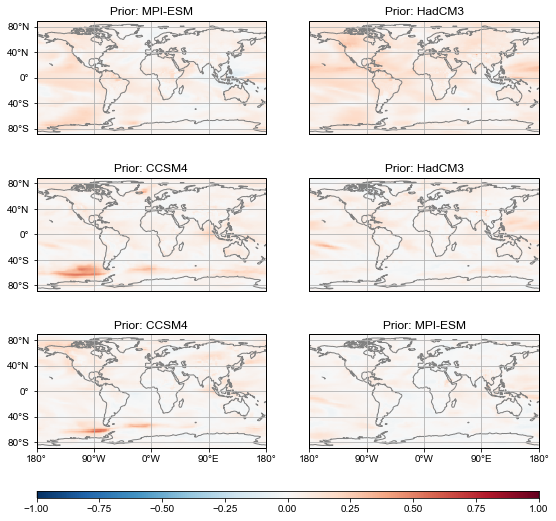

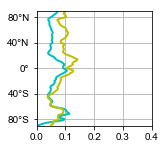

MPI-ESM
MPI-ESM
CCSM4
MPI-ESM
HadCM3
MPI-ESM


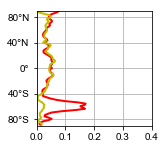

HadCM3
HadCM3
CCSM4
HadCM3
MPI-ESM
HadCM3


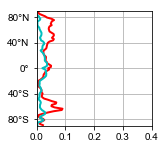

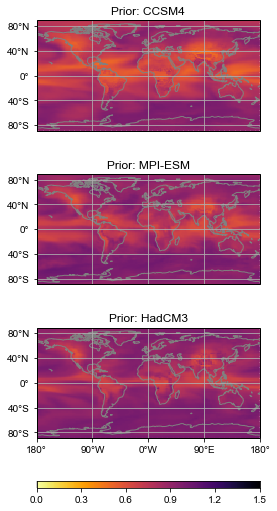

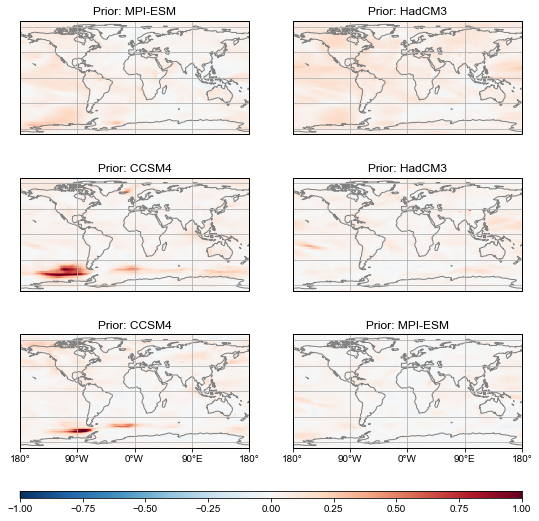

In [33]:
# Load files
SNR = 0.1
cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_400_rand_draws_one_truth_SNR_0.1_locrad_0.0.npy')
Xd   = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_400_rand_draws_one_truth_SNR_0.1_locrad_0.0_ad.npy')
savekey = ''

savename1 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/map_FOE'+savekey+'_SNR_'+str(SNR)
plt_FOE(cdd,Xd,savename1)

savename2 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/zonmean_frac_scale_prior_'+savekey+'_SNR_'+str(SNR)
plt_zonmean(cdd,Xd,savename2)

savename3 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/map_NSR'+savekey+'_SNR_'+str(SNR)
plt_n2s(cdd,Xd,savename3)

/Users/dan/anaconda2/envs/lmr_py3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


CCSM4
CCSM4
MPI-ESM
CCSM4
HadCM3
CCSM4


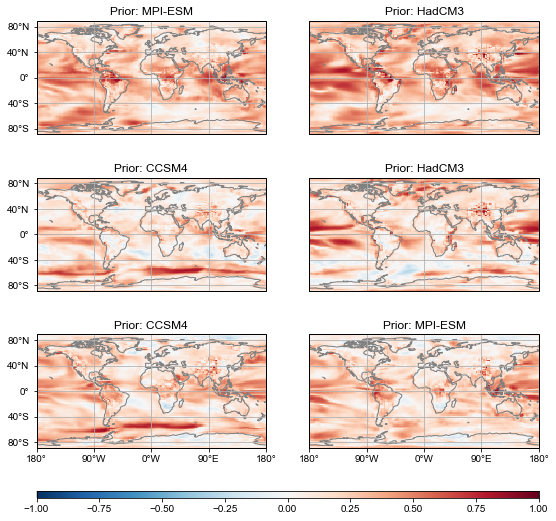

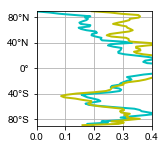

MPI-ESM
MPI-ESM
CCSM4
MPI-ESM
HadCM3
MPI-ESM


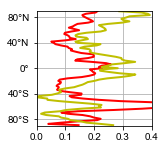

HadCM3
HadCM3
CCSM4
HadCM3
MPI-ESM
HadCM3


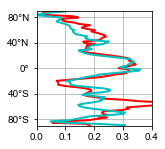

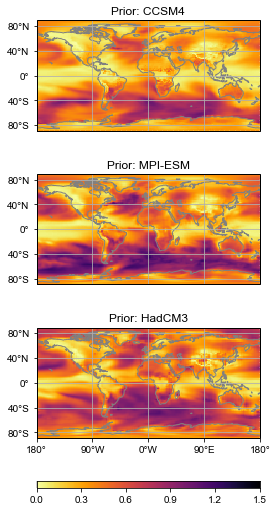

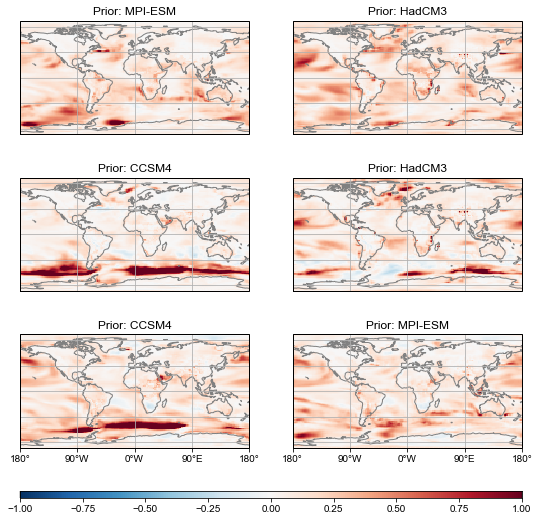

In [34]:
# Load files
SNR = 1.6
cdd = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_400_rand_draws_one_truth_SNR_1.6_locrad_0.0.npy')
Xd   = np.load('/Users/dan/Desktop/Nullspace/pt_out/PAGES2k_400_rand_draws_one_truth_SNR_1.6_locrad_0.0_ad.npy')
savekey = ''

savename1 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/map_FOE'+savekey+'_SNR_'+str(SNR)
plt_FOE(cdd,Xd,savename1)

savename2 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/zonmean_frac_scale_prior_'+savekey+'_SNR_'+str(SNR)
plt_zonmean(cdd,Xd,savename2)

savename3 = '/Users/dan/Desktop/Nullspace_Figs3/Prelims/map_NSR'+savekey+'_SNR_'+str(SNR)
plt_n2s(cdd,Xd,savename3)